In [98]:
from scipy.integrate import simps as simpson

In [99]:
from calc_ext import *

In [100]:
model = OpacityModel() 

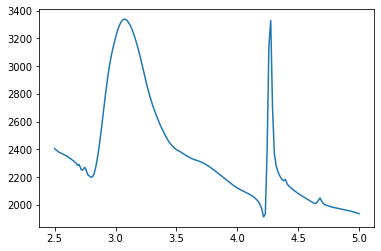

In [101]:
# plot total extinction vs. wavelength
model.plot_cext()

# run_opac_grid

In [102]:
from run_opac_grid import *

all_pars is a list of ranges of all four variables. master_iter_withid iterates through these ranges from the right-most variable to the left, to create one master list. (10)(10)(1)(30) = 3000 combinations

all_pars = [amins,amaxs,alphas,ice_thicks]

In [103]:
all_pars

[array([0.01]),
 array([ 0.011     ,  0.01391277,  0.01759684,  0.02225643,  0.02814987,
         0.03560389,  0.0450317 ,  0.05695597,  0.07203776,  0.09111317,
         0.1152397 ,  0.14575486,  0.18435036,  0.23316584,  0.29490754,
         0.37299827,  0.47176721,  0.59668991,  0.75469181,  0.95453219,
         1.20728978,  1.52697689,  1.9313163 ,  2.44272371,  3.08955044,
         3.90765517,  4.94239184,  6.25112403,  7.90640502, 10.        ]),
 array([-2.5       , -2.61111111, -2.72222222, -2.83333333, -2.94444444,
        -3.05555556, -3.16666667, -3.27777778, -3.38888889, -3.5       ]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]

In [104]:
master_iter_withid[:11]

[{'pars': (0.01, 0.010999999999999998, -2.5, 0.1), 'id': 0},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.2), 'id': 1},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.30000000000000004), 'id': 2},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.4), 'id': 3},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.5), 'id': 4},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.6), 'id': 5},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.7000000000000001), 'id': 6},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.8), 'id': 7},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.9), 'id': 8},
 {'pars': (0.01, 0.010999999999999998, -2.5, 1.0), 'id': 9},
 {'pars': (0.01, 0.010999999999999998, -2.611111111111111, 0.1), 'id': 10}]

In [105]:
# check that there are 3000 combinations
master_iter_withid[-1]

{'pars': (0.01, 10.0, -3.5, 1.0), 'id': 2999}

for each element of the list, run Opacity Model on the four input parameters

{'pars': (0.01, 0.010999999999999998, -2.5, 0.1), 'id': 0}


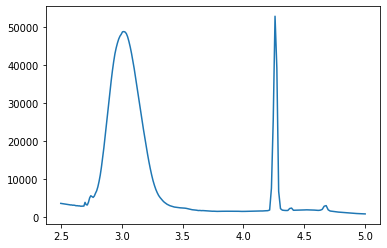

In [106]:
pars_and_id = master_iter_withid[0]
print(pars_and_id) #print input parameters
pars = pars_and_id['pars']
model = OpacityModel(amin=pars[0],amax=pars[1],alpha=pars[2],ice_thick=pars[3],outname="none")
model.plot_cext() #plot extinction vs. wavelength

write to file with write_opac() from calc_ext.py

columns:
- wavelength
- cext, total extinction
- csca, total scattering
- g, assymetry parameter


read files using fits.getdata()

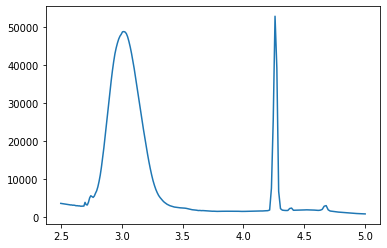

In [107]:
# check that reading data creates the same graph
id_=0
data_raw = fits.getdata('opacities/opacity_'+str(id_)+'.fits')
plt.plot(data_raw['wavelength'], data_raw['cext'])

In [108]:
# create sublist
# vary amax while keeping the other parameters fixed
def vary_amax(alpha_ind=0,ice_thick_ind=0): #input fixed alpha/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,3000,100):
        id_ = x+(alpha_ind*10)+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_amax()

(amin, amax, alpha, ice thickness)
(0.01, 0.010999999999999998, -2.5, 0.1)
(0.01, 0.09111317112210193, -2.5, 0.1)
(0.01, 0.9545321949630716, -2.5, 0.1)
(0.01, 10.0, -2.5, 0.1)


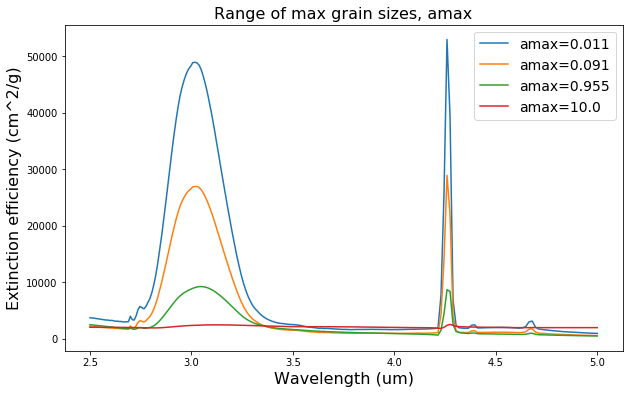

In [109]:
# graph a range of max grain sizes

# choose alpha and ice thickness to fix
# alpha[0] = -2.5
# ice thickness[0] = 0.1
pars,ids = vary_amax(0,0)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="amax="+str(round(pars[i]["pars"][1],3)))

ax1.set_title("Range of max grain sizes, amax",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)

In [110]:
# vary alpha while keeping the other parameters fixed
def vary_alpha(amax_ind=0,ice_thick_ind=0): #input fixed amax/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+10*x+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_alpha()

(amin, amax, alpha, ice thickness)
(0.01, 0.010999999999999998, -2.5, 0.1)
(0.01, 0.010999999999999998, -2.8333333333333335, 0.1)
(0.01, 0.010999999999999998, -3.1666666666666665, 0.1)
(0.01, 0.010999999999999998, -3.5, 0.1)


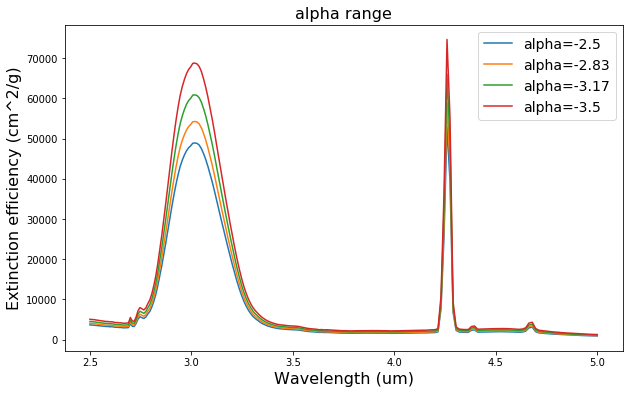

In [111]:
# graph alpha range

# choose amax and ice thickness to fix
# amax[0] = 0.011
# ice thickness[0] = 0.1
pars,ids = vary_alpha(0,0)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="alpha="+str(round(pars[i]["pars"][2],2)))

ax1.set_title("alpha range",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)

In [112]:
# vary ice thickness while keeping the other parameters fixed
def vary_icethick(amax_ind=0,alpha_ind=0): #input fixed amax/alpha
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+(alpha_ind*10)+x
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_icethick()

(amin, amax, alpha, ice thickness)
(0.01, 0.010999999999999998, -2.5, 0.1)
(0.01, 0.010999999999999998, -2.5, 0.4)
(0.01, 0.010999999999999998, -2.5, 0.7000000000000001)
(0.01, 0.010999999999999998, -2.5, 1.0)


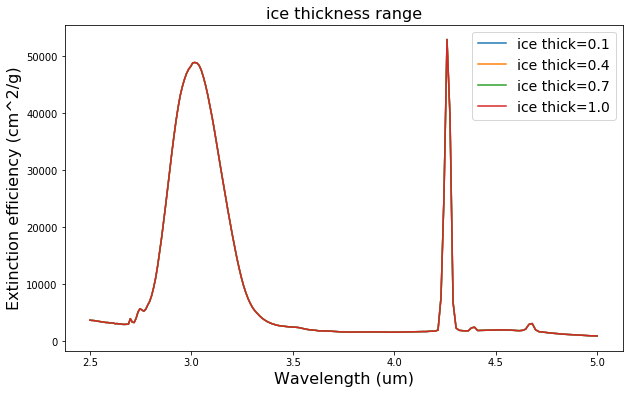

In [113]:
# graph ice thickness range

# choose amax and alpha to fix
# amax[0] = 0.011
# alpha[0] = -2.5
pars,ids = vary_icethick(0,0)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="ice thick="+str(round(pars[i]["pars"][3],2)))

ax1.set_title("ice thickness range",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)